# Necessary Packages

In [916]:
# Data-handeling/mathmatic packages
import numpy as np
import pandas as pd
import operator


# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Spotipy utilized packages
import os
import sys
import spotipy
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials

# Machine learning packages
from sklearn import preprocessing, cross_validation, datasets
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Collection

In [988]:
def spotify(cid, secret, username, playlistid):
    
        """This function takes the user's information
        and retrieves the song attributes that are
        attached to the songs in the playlist
        and then creates a global pandas dataframe
        of the song attributes"""

        try:
                client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
                sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
                sp.trace=False                
                
                #global top 50 playlist
                playlist= sp.user_playlist(username,playlistid)
                songs = playlist["tracks"]["items"]
                ids = []
                
                for i in range(len(songs)):
                        ids.append(songs[i]["track"]["id"])
                features = sp.audio_features(ids)
                
                
                #my top 50 playlist
                playlist2 = sp.user_playlist(username,playlistid2)
                songs2 = playlist2['tracks']['items']
                ids2 = []
                
                for j in range(len(songs2)):
                    ids2.append(songs2[j]['track']['id'])
                features2 = sp.audio_features(ids2)
                
                global top_50, my_100
                top_50= pd.DataFrame(features)
                my_100 = pd.DataFrame(features2)
                
                
           
        except:
                print('Error in input varibles')
                sys.exit()


if __name__ == '__main__':
        cid ="32bcd3dad9544a8aa0fde2807286c9d3"
        secret = "ab46e93eef2447b69e12be7af6e7062d"
        username = 'jlogg123'
        playlistid = '17v8zpBbXQx9IldVS5vXR6'
        playlistid2 = '3I6fu8j9PdnV9omEcETusy'
        spotify(cid, secret, username, playlistid)


# Data manipulation/description

In [918]:
# Top 50 global songs
top_50.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.13000,https://api.spotify.com/v1/audio-analysis/7wGo...,0.577,218320,0.522,7wGoVu4Dady5GV0Sv4UIsx,0.000090,5,0.1420,-6.594,0,0.0984,159.772,4,https://api.spotify.com/v1/tracks/7wGoVu4Dady5...,audio_features,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,0.119
1,0.18600,https://api.spotify.com/v1/audio-analysis/0ofb...,0.768,216897,0.517,0ofbQMrRDsUaVKq2mGLEAb,0.000038,7,0.1040,-4.323,0,0.0312,104.992,4,https://api.spotify.com/v1/tracks/0ofbQMrRDsUa...,audio_features,spotify:track:0ofbQMrRDsUaVKq2mGLEAb,0.418
2,0.17000,https://api.spotify.com/v1/audio-analysis/5UEn...,0.757,221013,0.748,5UEnHoDYpsxlfzWLZIc7LD,0.000000,8,0.0759,-5.794,0,0.4730,90.052,4,https://api.spotify.com/v1/tracks/5UEnHoDYpsxl...,audio_features,spotify:track:5UEnHoDYpsxlfzWLZIc7LD,0.693
3,0.00256,https://api.spotify.com/v1/audio-analysis/2ekn...,0.771,208827,0.696,2ekn2ttSfGqwhhate0LSR0,0.000010,9,0.1790,-6.258,0,0.0755,116.054,4,https://api.spotify.com/v1/tracks/2ekn2ttSfGqw...,audio_features,spotify:track:2ekn2ttSfGqwhhate0LSR0,0.656
4,0.13900,https://api.spotify.com/v1/audio-analysis/7EmG...,0.715,197993,0.802,7EmGUiUaOSGDnUUQUDrOXC,0.000000,11,0.1770,-4.647,0,0.0394,124.989,4,https://api.spotify.com/v1/tracks/7EmGUiUaOSGD...,audio_features,spotify:track:7EmGUiUaOSGDnUUQUDrOXC,0.327


In [989]:
# My top 100 played songs in 2017
my_100.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.003920,https://api.spotify.com/v1/audio-analysis/2GnL...,0.471,214173,0.885,2GnLhhzlKak1Q12b8jw25W,0.000036,0,0.1050,-3.317,0,0.0367,95.027,4,https://api.spotify.com/v1/tracks/2GnLhhzlKak1...,audio_features,spotify:track:2GnLhhzlKak1Q12b8jw25W,0.221
1,0.003480,https://api.spotify.com/v1/audio-analysis/4xuF...,0.406,344172,0.843,4xuFuXOYmvRkbrBxLD0YwG,0.000073,2,0.0867,-6.833,0,0.0829,153.246,3,https://api.spotify.com/v1/tracks/4xuFuXOYmvRk...,audio_features,spotify:track:4xuFuXOYmvRkbrBxLD0YwG,0.125
2,0.811000,https://api.spotify.com/v1/audio-analysis/5zlV...,0.468,376960,0.319,5zlVZicMhDEwsZPmnccbSe,0.328000,8,0.1090,-12.402,0,0.0315,109.994,4,https://api.spotify.com/v1/tracks/5zlVZicMhDEw...,audio_features,spotify:track:5zlVZicMhDEwsZPmnccbSe,0.123
3,0.249000,https://api.spotify.com/v1/audio-analysis/4Mr8...,0.665,277800,0.729,4Mr8GSoV3ZL5rgcC7KWufJ,0.000159,0,0.1090,-8.336,0,0.0897,148.044,4,https://api.spotify.com/v1/tracks/4Mr8GSoV3ZL5...,audio_features,spotify:track:4Mr8GSoV3ZL5rgcC7KWufJ,0.697
4,0.000314,https://api.spotify.com/v1/audio-analysis/3r1a...,0.421,225801,0.942,3r1aUbw1yQUcgcJh6w3xzl,0.000001,6,0.0704,-5.289,0,0.1400,77.573,4,https://api.spotify.com/v1/tracks/3r1aUbw1yQUc...,audio_features,spotify:track:3r1aUbw1yQUcgcJh6w3xzl,0.303


In [1000]:
# removing unwanted features
top_50 = top_50.drop(['id','analysis_url','track_href','type','uri'],axis =1)
my_100 = my_100.drop(['id','analysis_url','track_href','type','uri'],axis =1)

In [1001]:
# creating classes 
top_50['class'] = ["Global"] * len(top_50)
my_100['class'] = ["My"] * len(my_100)

In [1002]:
# description of each dataset
top_50.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.173173,0.711560,211667.060000,0.669040,5.044776e-03,5.200000,0.134172,-5.497200,0.540000,0.094696,120.774100,3.960000,0.492134
std,0.191494,0.124839,33269.197123,0.142619,2.971578e-02,3.516724,0.069844,1.343851,0.503457,0.079199,28.588653,0.197949,0.228287
min,0.000259,0.258000,124056.000000,0.299000,0.000000e+00,0.000000,0.021500,-8.280000,0.000000,0.023200,79.028000,3.000000,0.096700
25%,0.033000,0.631250,187380.250000,0.550250,0.000000e+00,1.250000,0.086900,-6.349000,0.000000,0.048200,97.247750,4.000000,0.327750
50%,0.134500,0.725000,210473.500000,0.692000,6.350000e-07,5.000000,0.106000,-5.394000,1.000000,0.076100,108.469000,4.000000,0.430000
75%,0.216250,0.797250,231805.750000,0.786750,3.980000e-05,8.000000,0.172250,-4.328000,1.000000,0.099075,143.429750,4.000000,0.688750
max,0.779000,0.936000,297485.000000,0.895000,2.100000e-01,11.000000,0.358000,-3.023000,1.000000,0.473000,180.043000,4.000000,0.931000


In [1003]:
my_100.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000
mean,0.223002,0.51817,237190.050000,0.709840,0.065297,5.350000,0.211342,-7.294730,0.720000,0.090231,124.387960,3.97,0.457590
std,0.275828,0.15585,70553.899425,0.222974,0.182664,3.608002,0.164767,2.950835,0.451261,0.082889,30.490207,0.30,0.248805
min,0.000033,0.17600,90200.000000,0.129000,0.000000,0.000000,0.024400,-17.001000,0.000000,0.023600,72.360000,3.00,0.035300
25%,0.007838,0.40000,185576.500000,0.549500,0.000000,2.000000,0.095050,-8.644750,0.000000,0.038075,101.905750,4.00,0.249000
50%,0.090700,0.50350,231793.000000,0.761000,0.000100,6.000000,0.132500,-6.426000,1.000000,0.055050,118.697000,4.00,0.440000
75%,0.342250,0.63850,277810.000000,0.904250,0.009185,9.000000,0.332000,-5.299500,1.000000,0.110250,140.495500,4.00,0.625000
max,0.994000,0.86900,423773.000000,0.997000,0.907000,11.000000,0.858000,-2.554000,1.000000,0.464000,202.940000,5.00,0.980000


In [1004]:
# combining dataframes
all_data = top_50.append(my_100)

In [996]:
all_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.206393,0.582633,228682.386667,0.696240,0.045213,5.300000,0.185619,-6.695553,0.660000,0.091719,123.183340,3.966667,0.469105
std,0.251327,0.172135,61783.159164,0.200238,0.152552,3.566718,0.144825,2.664998,0.475296,0.081439,29.822652,0.269642,0.241942
min,0.000033,0.176000,90200.000000,0.129000,0.000000,0.000000,0.021500,-17.001000,0.000000,0.023200,72.360000,3.000000,0.035300
25%,0.023450,0.455500,186307.000000,0.548500,0.000000,2.000000,0.092200,-7.736750,0.000000,0.040400,99.994250,4.000000,0.299750
50%,0.105500,0.590500,225207.000000,0.730000,0.000016,5.000000,0.124000,-6.176500,1.000000,0.061150,116.571500,4.000000,0.435500
75%,0.280000,0.714000,258305.750000,0.871250,0.002377,8.000000,0.252000,-4.999500,1.000000,0.101400,141.952750,4.000000,0.653750
max,0.994000,0.936000,423773.000000,0.997000,0.907000,11.000000,0.858000,-2.554000,1.000000,0.473000,202.940000,5.000000,0.980000


In [1022]:
#converting milliseconds to minutes
all_data['duration_ms'] = (all_data['duration_ms']*0.001)/60
my_100['duration_ms'] = (my_100['duration_ms']*0.001)/60
top_50['duration_ms'] = (top_50['duration_ms']*0.001)/60

#renaming column
all_data = all_data.rename(columns = {'duration_ms' : 'duration_min'})
my_100 = my_100.rename(columns = {'duration_ms' : 'duration_min'})
top_50 = top_50.rename(columns = {'duration_ms' : 'duration_min'})

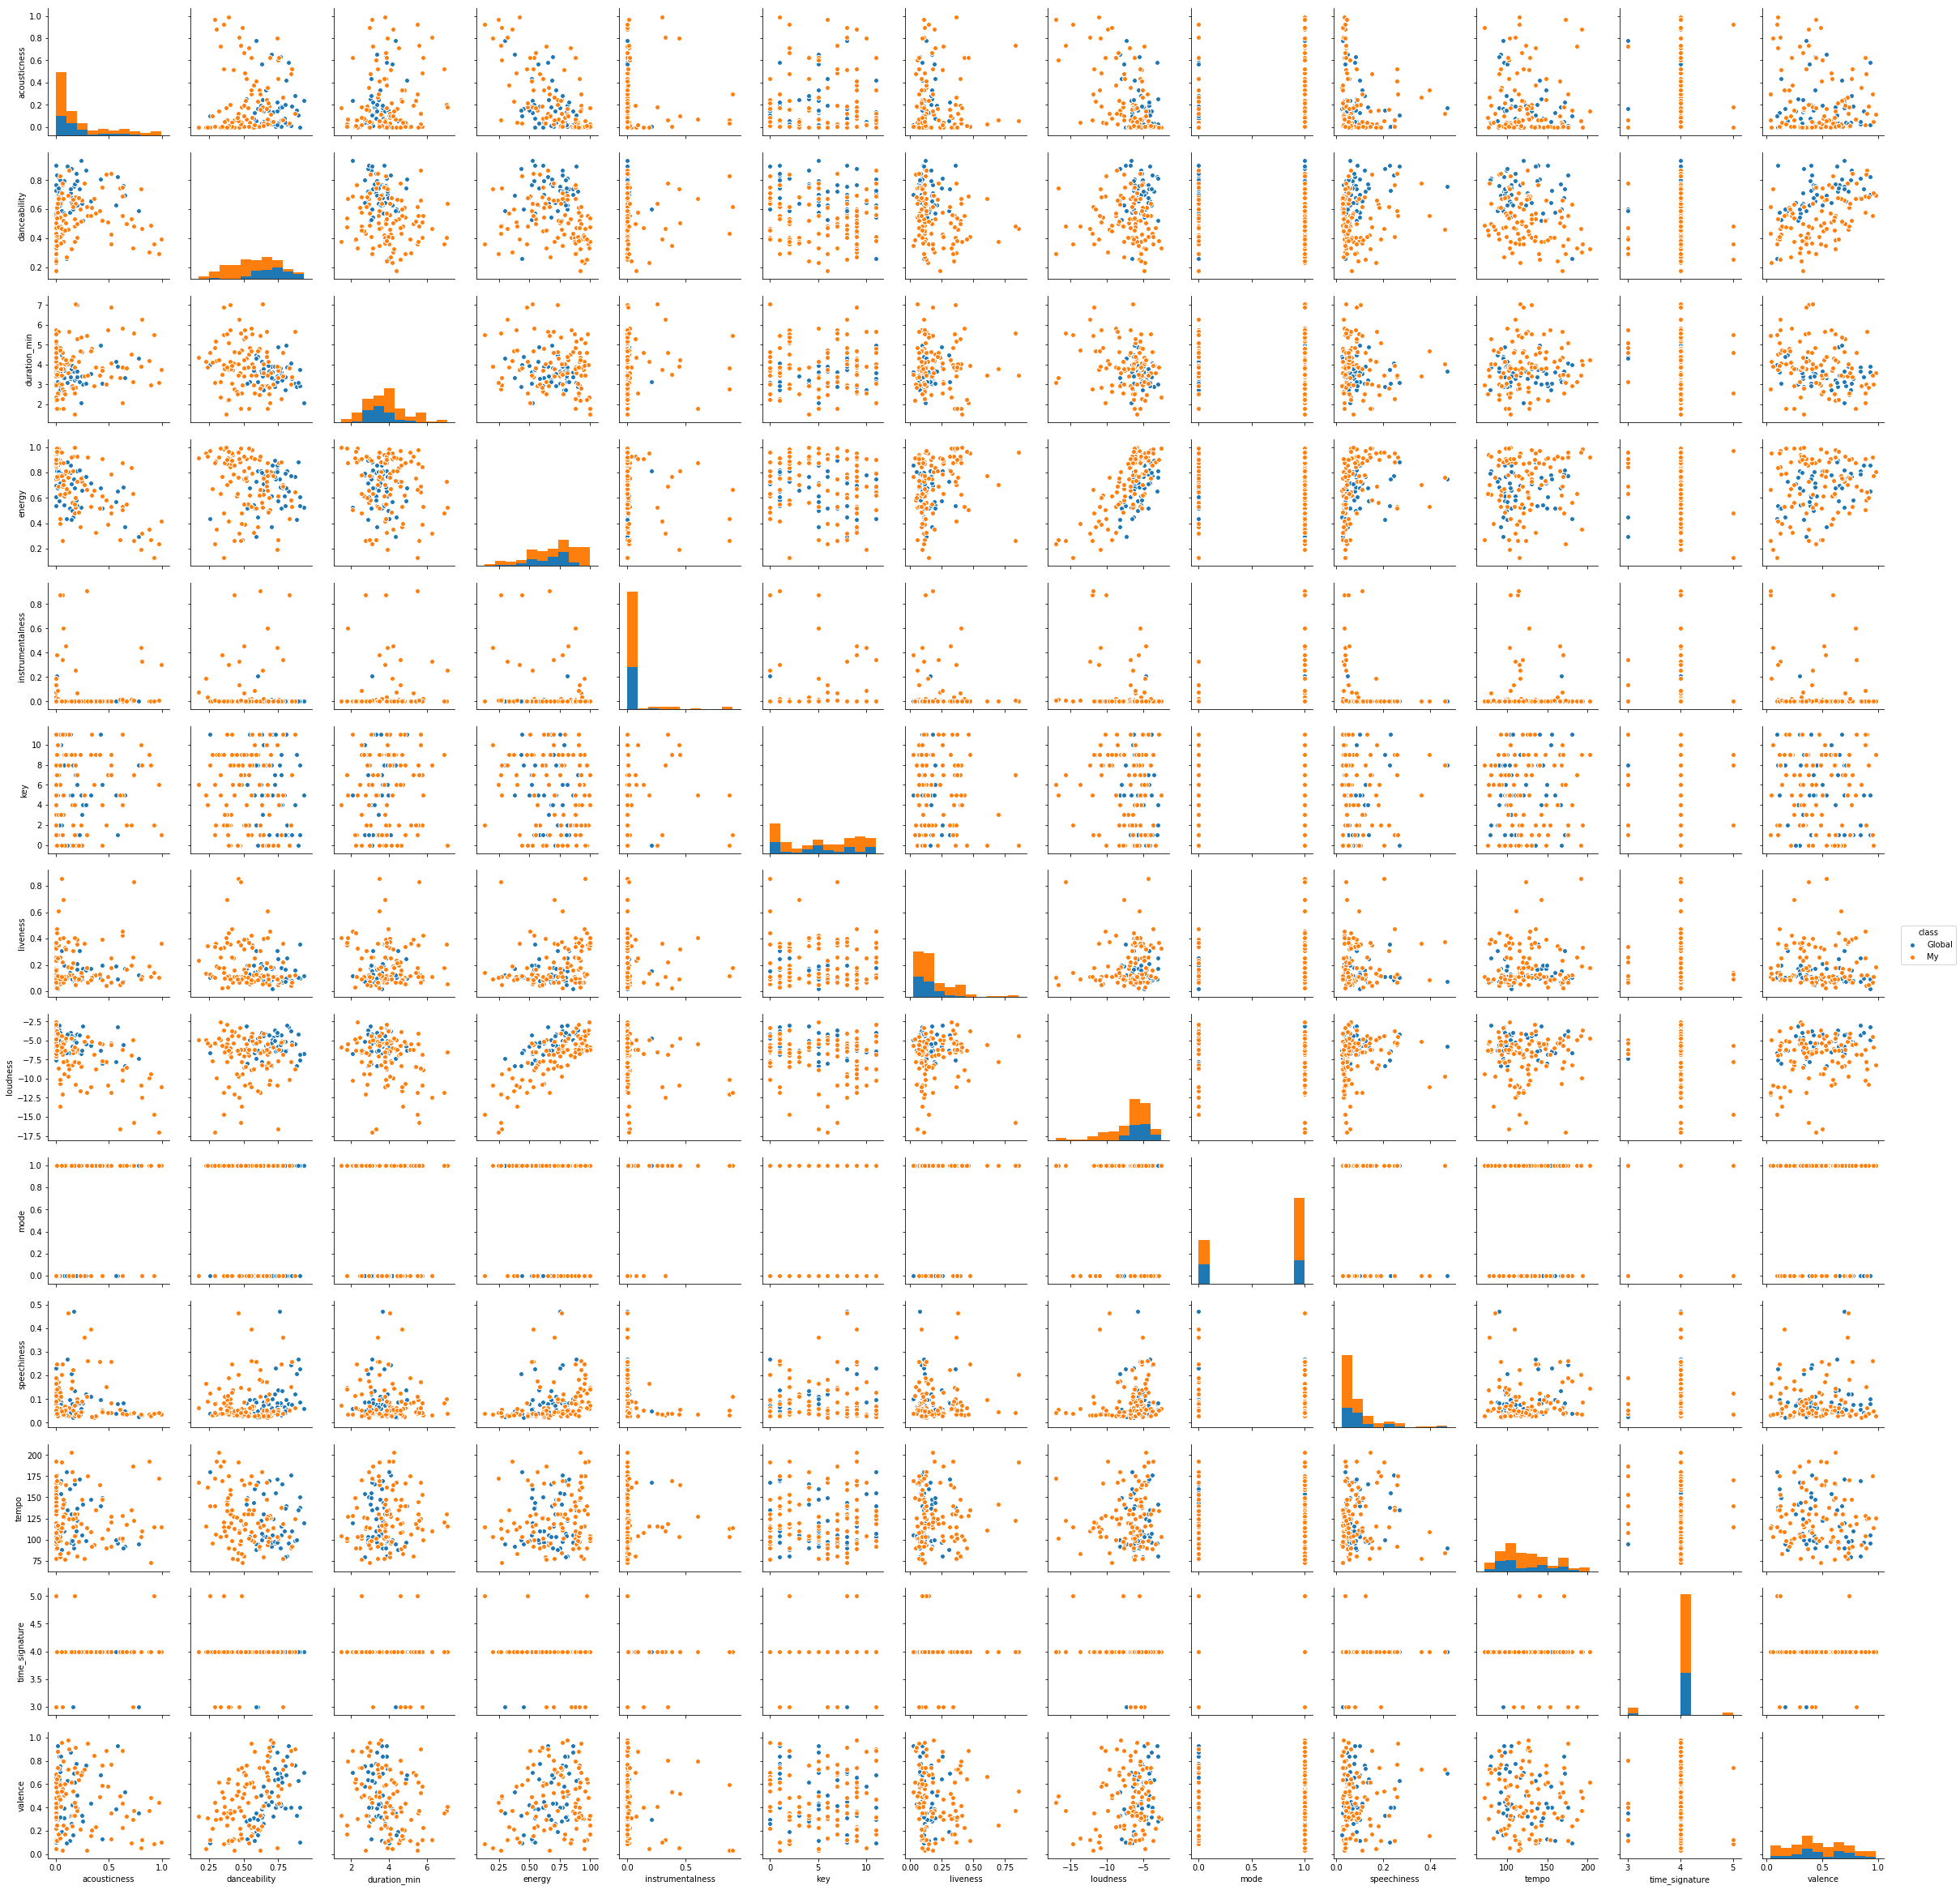

In [927]:
sns.pairplot(data = all_data, hue = 'class')
plt.show()

# Machine learning 

In [928]:
# creating training and test datasets
X = all_data.drop('class',axis =1)
y = all_data['class']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size =0.2)

## Decision Tree


In [929]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [930]:
prediction = dt.predict(X_test)

In [931]:
# confusion matrix shape is actual x, where prediction position 1 = 'Global' position 2 = 'My'
# i.e. 18 is the correct number of 'My' class predictions
print('Decision Tree Prediction Results')
print(confusion_matrix(y_test,prediction))
print("\n")
print(classification_report(y_test,prediction))

Decision Tree Prediction Results
[[ 5  5]
 [ 2 18]]


             precision    recall  f1-score   support

     Global       0.71      0.50      0.59        10
         My       0.78      0.90      0.84        20

avg / total       0.76      0.77      0.75        30



# Random Forest



In [932]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [933]:
rf_pred = rf.predict(X_test)

In [934]:
print('Random Forest Prediction Results')
print(confusion_matrix(y_test,rf_pred))
print("\n")
print(classification_report(y_test,rf_pred))

Random Forest Prediction Results
[[ 4  6]
 [ 2 18]]


             precision    recall  f1-score   support

     Global       0.67      0.40      0.50        10
         My       0.75      0.90      0.82        20

avg / total       0.72      0.73      0.71        30



# Feature analysis with Random Forest Model

In [1038]:
rf_feature_importance = rf.feature_importances_
feat_imp_dic
print("Total Influence:",sum(feat_imp_dic.values()))

Total Influence: 1.0


In [1036]:
top_5_feats = dict(sorted(feat_imp_dic.items(),key = operator.itemgetter(1), reverse = True)[0:5])
top_5_feats

{'danceability': 0.29547026539379917,
 'duration_min': 0.078859912711447683,
 'liveness': 0.090478847617611047,
 'loudness': 0.21069639027999684,
 'speechiness': 0.063412270564009082}

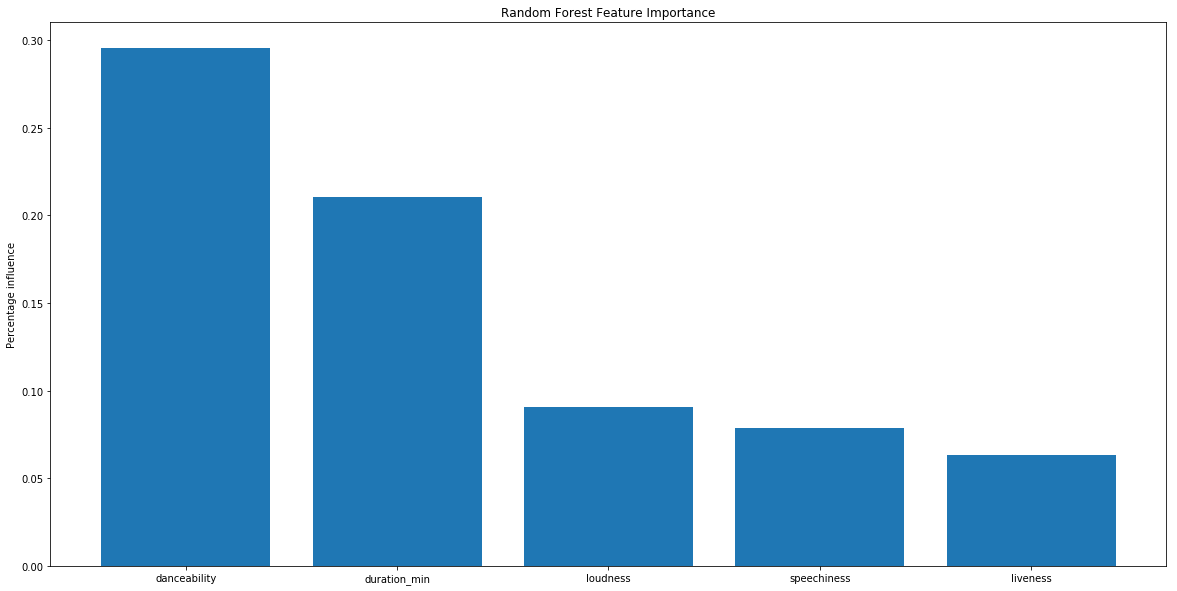

In [1040]:
plt.figure(figsize=(20, 10))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(top_5_feats)), sorted(list(top_5_feats.values()), reverse = True), align='center')
plt.xticks(range(len(top_5_feats)), list(top_5_feats.keys()))
plt.ylabel('Percentage influence')
plt.savefig("Random Forest Feature Importance.png")
plt.show()

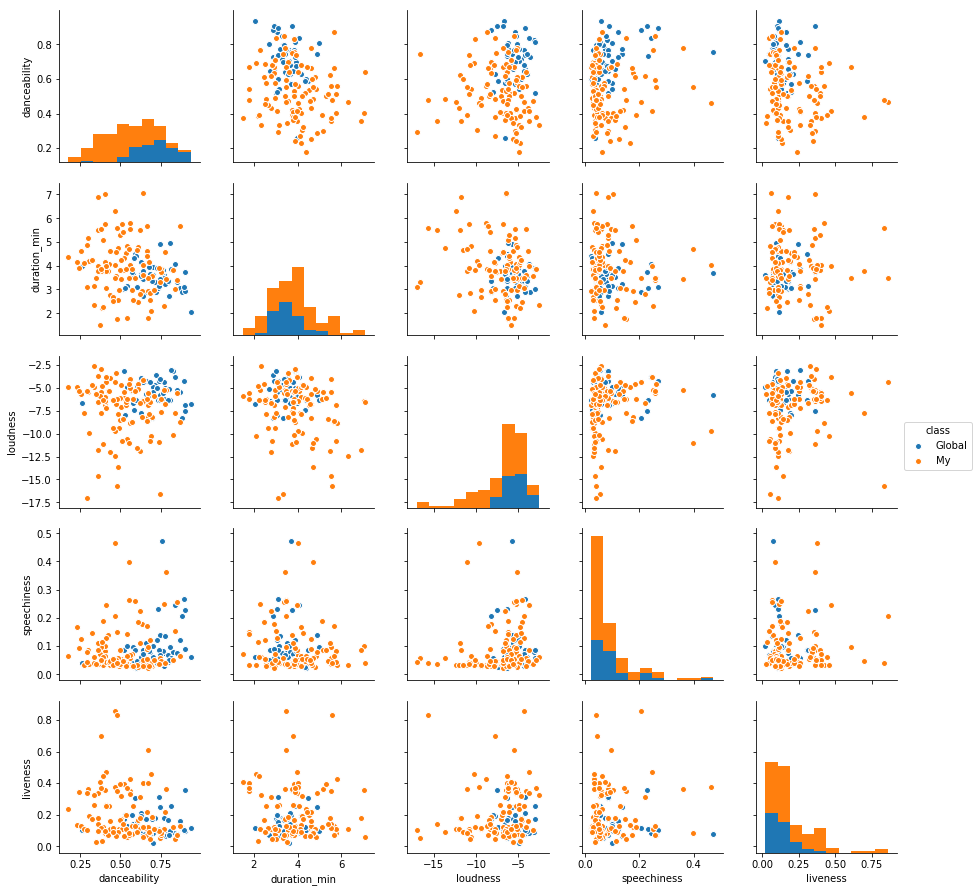

In [938]:
# looking at the relationship between the top 5 influencial features
sns.pairplot(data = all_data, vars = top_5_feats, hue = 'class')
plt.savefig("Feature relation.png")
plt.show()

In [1026]:
print("Top Global 50 Feature Description")
top_50[list(top_5_feats)].describe()

Top Global 50 Feature Description


,danceability,duration_min,loudness,speechiness,liveness
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.711560,0.000059,-5.497200,0.094696,0.134172
std,0.124839,0.000009,1.343851,0.079199,0.069844
min,0.258000,0.000034,-8.280000,0.023200,0.021500
25%,0.631250,0.000052,-6.349000,0.048200,0.086900
50%,0.725000,0.000058,-5.394000,0.076100,0.106000
75%,0.797250,0.000064,-4.328000,0.099075,0.172250
max,0.936000,0.000083,-3.023000,0.473000,0.358000


In [1027]:
print("My Top 100 Feature Description")
my_100[list(top_5_feats)].describe()

My Top 100 Feature Description


,danceability,duration_min,loudness,speechiness,liveness
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,0.51817,0.000066,-7.294730,0.090231,0.211342
std,0.15585,0.000020,2.950835,0.082889,0.164767
min,0.17600,0.000025,-17.001000,0.023600,0.024400
25%,0.40000,0.000052,-8.644750,0.038075,0.095050
50%,0.50350,0.000064,-6.426000,0.055050,0.132500
75%,0.63850,0.000077,-5.299500,0.110250,0.332000
max,0.86900,0.000118,-2.554000,0.464000,0.858000


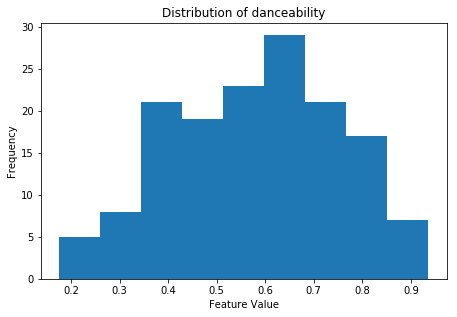

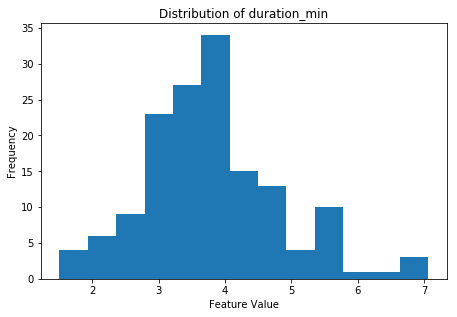

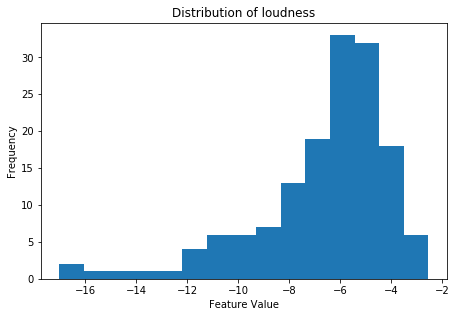

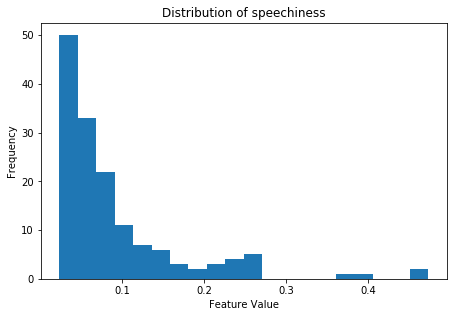

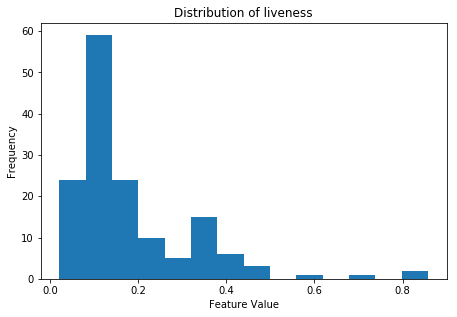

In [1029]:
# plotting histograms of the top 5 most influencial features
for i in range(len(list(feat_of_interest.keys()))):
    plt.figure(figsize=(16, 16))
    plt.subplot(3, 2, i+1)
    plt.title('Distribution of %s' % feat_of_interest.keys()[i])
    plt.hist(feat_of_interest.values[:,i], bins = 'auto')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.savefig("Feature Frequency distribution.png")
    plt.show()

In [1030]:
print("Correlation of top features")
correlation = feat_of_interest.corr()
correlation

Correlation of top features


,danceability,duration_min,loudness,speechiness,liveness
danceability,1.000000,-0.216257,0.094940,0.150628,-0.263894
duration_min,-0.216257,1.000000,-0.253030,-0.073569,0.018298
loudness,0.094940,-0.253030,1.000000,0.123364,0.021892
speechiness,0.150628,-0.073569,0.123364,1.000000,0.052665
liveness,-0.263894,0.018298,0.021892,0.052665,1.000000


In [965]:
# Creating a subset from the top 5 influencial features
subset = all_data[['danceability', 'duration_min', 'loudness', 'speechiness', 'liveness', 'class']]

In [966]:
#Converting classes to binary (Global = 1, My = 0)
subset['class'] = subset['class'].str.contains('Global').astype(int)

/opt/rh/rh-python35/root/usr/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [1041]:
x = subset[['danceability','speechiness']].as_matrix()
X = preprocessing.scale(x)
y = subset['class'].as_matrix()

In [1042]:
#logistic regression
lr = LogisticRegressionCV()
lr.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

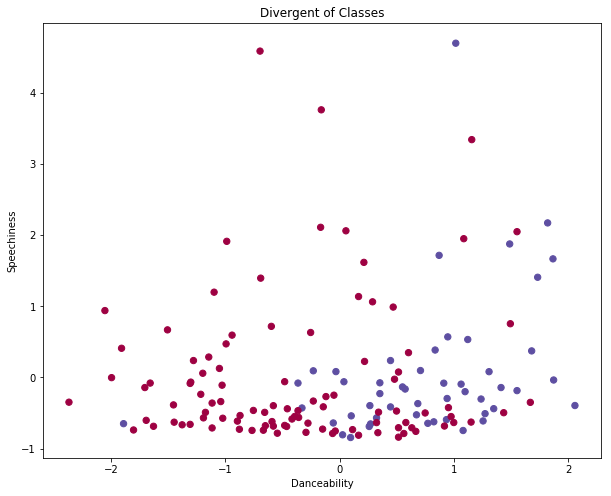

In [1046]:
# Generate a dataset and plot it
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.title('Divergent of Classes')
plt.xlabel('Danceability')
plt.ylabel('Speechiness')

In [971]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1],
                edgecolor = 'black',linewidth = '1',s=50, c=y, cmap=plt.cm.Spectral)

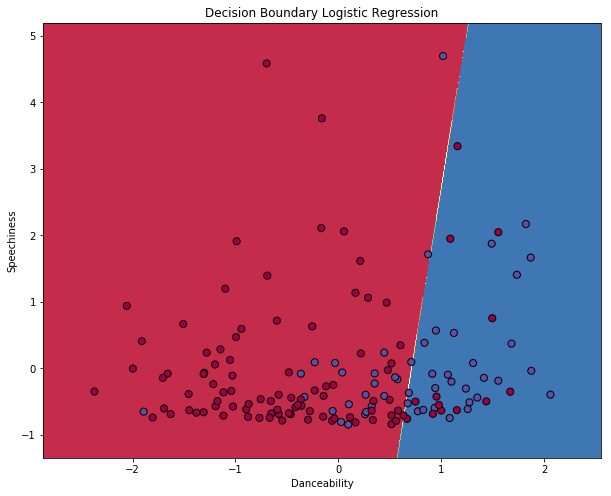

In [1045]:
plot_decision_boundary(lambda x: lr.predict(x))
plt.title("Decision Boundary Logistic Regression")
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

In [973]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size =50)


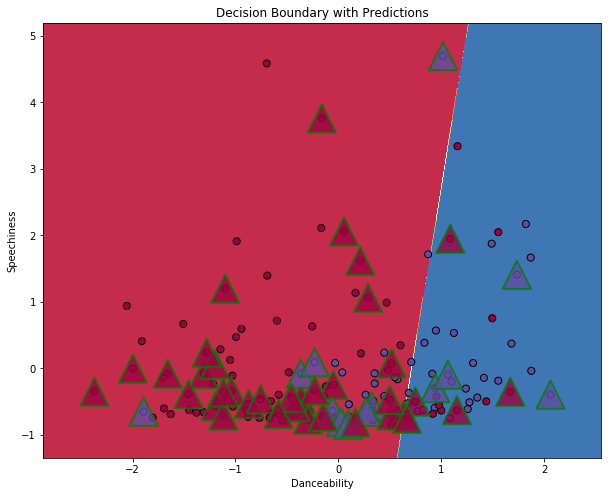

In [1047]:
#visializing how accurate the decision boundary is


plot_decision_boundary(lambda x: lr.predict(x))
plt.title("Decision Boundary with Predictions")
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.scatter(X_test[:,0], X_test[:,1], marker = "^",alpha = 0.78,edgecolor = 'green',linewidth = '2', s=800, c=y_test, cmap=plt.cm.Spectral)
plt.show()

# Neural Network

In [1049]:
num_examples = len(X_train) # training set size
nn_input_dim = X_train.shape[1] # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# learning rate for gradient descent (typically set to 0.01)
lr = 0.01 

In [1050]:
def neural_network_training(inputs,desired,nn_hdim,epochs):
    
    
    np.random.seed(3)
    w1 = 2 * np.random.random((nn_input_dim,nn_hdim))-1
    w2 = 2 * np.random.random((nn_hdim,nn_output_dim)) -1
    
    weights = {}
    
    for i in range(epochs):
        
        #forward propagation
        h1 = np.dot(inputs,w1)
        a1 = np.tanh(h1)
        h2 = np.dot(a1,w2)
        exp_h2 = np.exp(h2)
        probability = exp_h2 / np.sum(exp_h2, axis = 1, keepdims=True)

        #backward propagation
        delta2 = probability
        delta2[range(num_examples),desired] -=1
        dw2 = a1.T.dot(delta2)
        delta1 = delta2.dot(w2.T) * (1 - np.power(a1,2))
        dw1 = np.dot(inputs.T,delta1)

        w1 += -lr * dw1
        w2 += -lr * dw2


        weights = {'w1': w1, 'w2':w2}

    return weights

In [1051]:
def prediction(nn, inputs,desired):
    
    w1, w2 = nn['w1'], nn['w2']
    
    #forward prop
    h1 = np.dot(inputs,w1)
    a1 = np.tanh(h1)
    h2 = np.dot(a1,w2)
    exp_h2 = np.exp(h2)
    probability = exp_h2 / np.sum(exp_h2, axis = 1, keepdims=True)
    return sum(np.argmax(probability,axis = 1) == desired)/num_examples


In [1052]:
print("Results of Backward Propagating Neural Network")
hid_dim = [1,2,3,4,5,6]
for i, nn_hdim in enumerate(hid_dim):
    nn = neural_network_training(X_train,y_train,nn_hdim,1000)
    print("training prediction accuracy with %i hidden layer node(s): %s" %(i,str(prediction(nn,X_train,y_train))))
print('\n')
for i, nn_hdim in enumerate(hid_dim):
    nn = neural_network_training(X_train,y_train,nn_hdim,1000)
    print("test prediction accuracy with %i hidden layer node(s): %s" %(i,str(prediction(nn,X_test,y_test))))

Results of Backward Propagating Neural Network
training prediction accuracy with 0 hidden layer node(s): 0.78
training prediction accuracy with 1 hidden layer node(s): 0.77
training prediction accuracy with 2 hidden layer node(s): 0.79
training prediction accuracy with 3 hidden layer node(s): 0.79
training prediction accuracy with 4 hidden layer node(s): 0.79
training prediction accuracy with 5 hidden layer node(s): 0.79


test prediction accuracy with 0 hidden layer node(s): 0.34
test prediction accuracy with 1 hidden layer node(s): 0.32
test prediction accuracy with 2 hidden layer node(s): 0.32
test prediction accuracy with 3 hidden layer node(s): 0.31
test prediction accuracy with 4 hidden layer node(s): 0.33
test prediction accuracy with 5 hidden layer node(s): 0.31


In [1053]:
def plot_prediction(nn, inputs):
    
    w1, w2 = nn['w1'], nn['w2']
    
    #forward prop
    h1 = np.dot(inputs,w1)
    a1 = np.tanh(h1)
    h2 = np.dot(a1,w2)
    exp_h2 = np.exp(h2)
    probability = exp_h2 / np.sum(exp_h2, axis = 1, keepdims=True)
    return np.argmax(probability,axis = 1) 

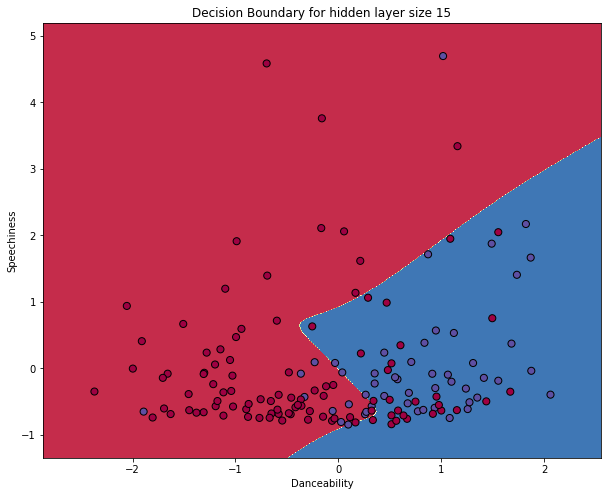

In [1054]:
model = neural_network_training(X_train,y_train,15,1000)

plot_decision_boundary(lambda x: plot_prediction(model, x))
plt.title("Decision Boundary for hidden layer size 15")
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.savefig("Decision Boundary for hidden layer size 15.png")

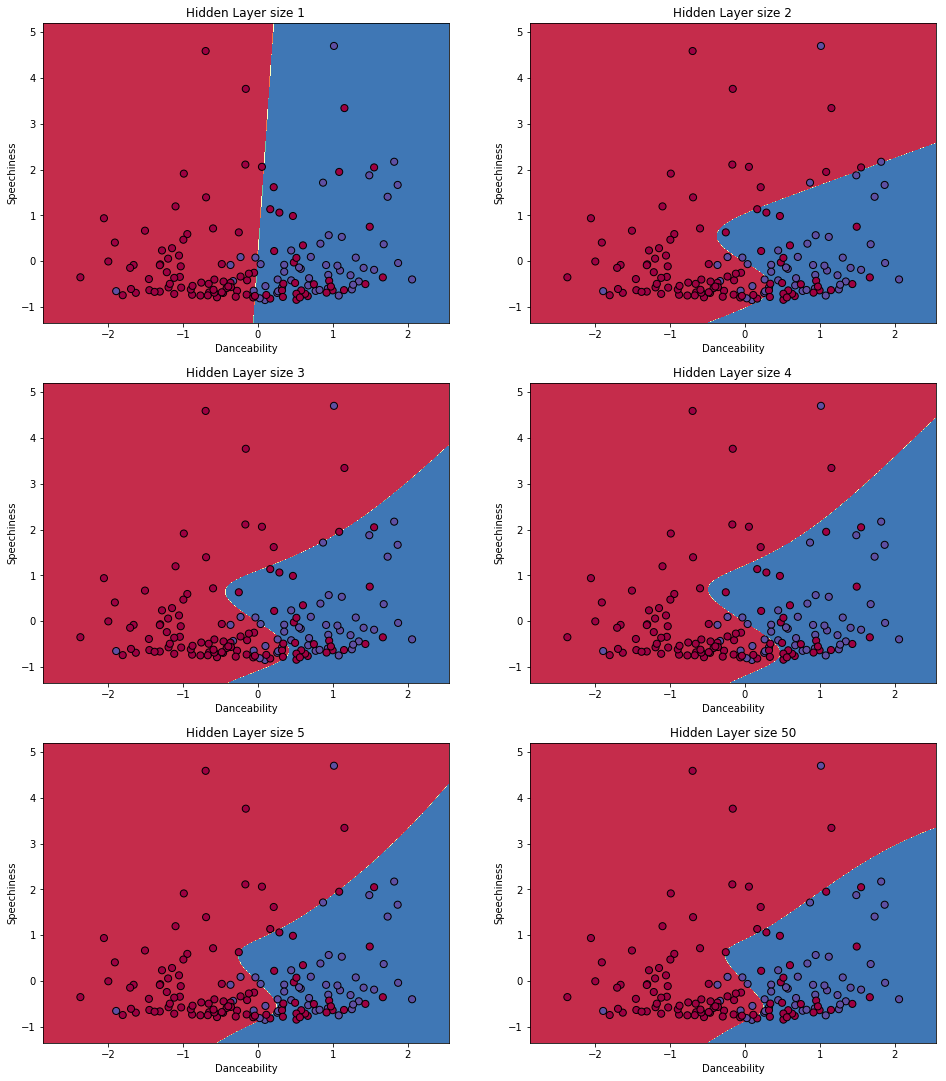

In [1056]:
# plotting the test accuracy
plt.figure(figsize=(16, 32))
hid_dim = [1,2,3,4,5,50]
for i, nn_hdim in enumerate(hid_dim):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    plt.xlabel('Danceability')
    plt.ylabel('Speechiness')
    model = neural_network_training(X_train,y_train,nn_hdim,1000)
    plot_decision_boundary(lambda x: plot_prediction(model, x))
    plt.savefig("Decision Boundary for various hidden layer sizes.png")
plt.show()

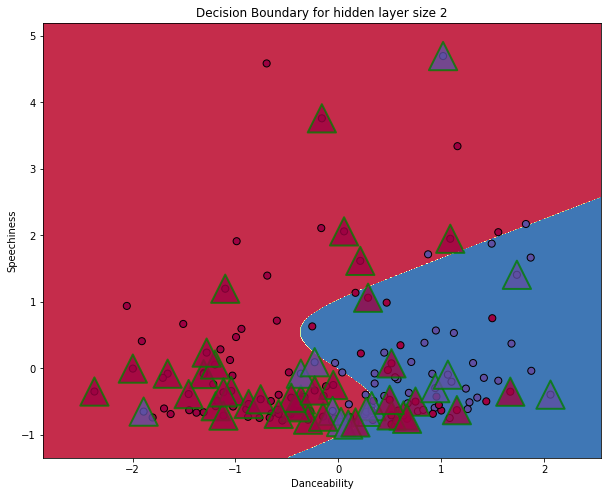

In [1058]:
model = neural_network_training(X_train,y_train,2,1000)

plot_decision_boundary(lambda x: plot_prediction(model, x))
plt.scatter(X_test[:,0], X_test[:,1], marker = "^",alpha = 0.78,edgecolor = 'green',linewidth = '2', s=800, c=y_test, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for hidden layer size 2")
plt.xlabel('Danceability')
plt.ylabel('Speechiness')

plt.savefig("Decision Boundary for hidden layer size 2.png")